## 「ベイズ推論による機械学習入門」
##   P.145 ガウス混合モデルに対するギブスサンプリング

In [44]:
using Distributions
using Plots

## 真のモデル

In [54]:
N = 300
D = 2
K = 3

μ₁_true = [5.0; 35.0]
μ₂_true = [-20.0; 10.0]
μ₃_true = [30.0; -20.0]

Σ₁_true = [
    250.0 65.0
    65.0 270.0
]

Σ₂_true = [
    125.0 -45.0
    -45.0 175.0
]

Σ₃_true = [
    210.0 -15.0
    -15.0 250.0
]

π_true = [0.45, 0.25, 0.3]

multi_gaussian = MvNormal[
    MvNormal(μ₁_true, Σ₁_true), 
    MvNormal(μ₂_true, Σ₂_true), 
    MvNormal(μ₃_true, Σ₃_true)
]

true_model = MixtureModel(multi_gaussian, π_true)

MixtureModel{MvNormal}(K = 3)
components[1] (prior = 0.4500): FullNormal(
dim: 2
μ: [5.0, 35.0]
Σ: [250.0 65.0; 65.0 270.0]
)

components[2] (prior = 0.2500): FullNormal(
dim: 2
μ: [-20.0, 10.0]
Σ: [125.0 -45.0; -45.0 175.0]
)

components[3] (prior = 0.3000): FullNormal(
dim: 2
μ: [30.0, -20.0]
Σ: [210.0 -15.0; -15.0 250.0]
)



In [71]:
x_true = rand(true_model, N)
p_true = pdf(true_model, x_true);

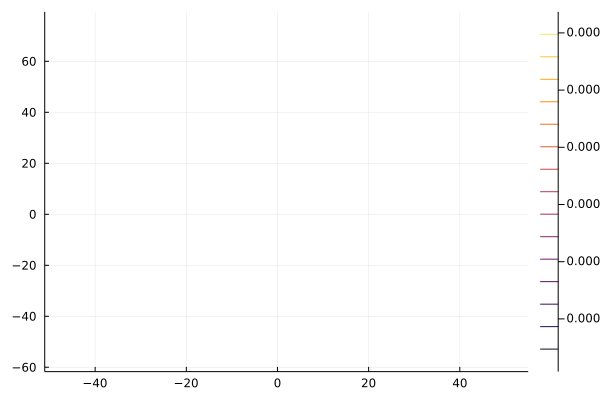

Arrays have incorrect length or dimension.


In [73]:
contour(x_true[1, :], x_true[2, :], p_true)

In [74]:
using LinearAlgebra

function MultivariateGaussian(x...; μ, Σ)
    D = length(μ)
    Λ = inv(Σ)
    cons = 1 / √((2π)^D * det(Σ))
    cons * exp(-0.5 * (x .- μ)' * Λ * (x .- μ))
end

MultivariateGaussian (generic function with 1 method)

In [75]:
# x軸を設定
x1 = range(-5, 5, length=50)
x2 = range(-5, 5, length=50)

# μを設定
μ = [
    0.0 
    0.0
]

# ケース1
Σ1 = [
    3.0 0.0
    0.0 3.0
]

z1 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ1)

# ケース2
Σ2 = [
    2.0 -√3
    -√3 4.0
]

z2 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ2)

# ケース3
Σ3 = [
    4.0 √3
    √3 2.0
]

z3 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ3)

50×50 Matrix{Float64}:
 0.000125608  0.000131568  0.000135533  …  8.01636e-12  3.77413e-12
 0.000196243  0.000208541  0.000217948     2.50332e-11  1.1957e-11
 0.000296552  0.000319716  0.000338994     7.5611e-11   3.66402e-11
 0.000433448  0.000474095  0.000509987     2.20894e-10  1.08598e-10
 0.000612776  0.000679981  0.000742089     6.24182e-10  3.11326e-10
 0.000837909  0.000943316  0.00104444   …  1.70596e-9   8.63254e-10
 0.00110821   0.00126575   0.0014218       4.50979e-9   2.31522e-9
 0.00141767   0.00164273   0.00187208      1.15312e-8   6.00585e-9
 0.00175412   0.00206213   0.00238418      2.8518e-8    1.50691e-8
 0.00209928   0.00250378   0.00293687      6.82173e-8   3.65702e-8
 0.00243004   0.00294038   0.00349912   …  1.57834e-7   8.58418e-8
 0.00272073   0.00333996   0.00403239      3.53211e-7   1.94894e-7
 0.00294637   0.00366952   0.00449465      7.64537e-7   4.27986e-7
 ⋮                                      ⋱               
 1.94894e-7   3.53211e-7   6.29556e-7      0

In [ ]:
using Plots
plot(contour(x1, x2, z1), contour(x1, x2, z2), contour(x1, x2, z3))
plot!(xlabel="x1", ylabel="x2")